In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import joblib
%matplotlib inline

In [14]:
dt_model = joblib.load("saved_models/mirai_attack_DT_classifier.joblib")
nn_model = joblib.load("saved_models/mirai_attack_NN_classifier.joblib")
svm_model = joblib.load("saved_models/mirai_attack_SVM_classifier.joblib")

/home/levalle/.local/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/levalle/.local/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.24.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/levalle/.local/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator MLPClassifier from version 0.24.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/levalle/.local/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator SVC from version 0.24.2 when using version 0.24.1. This might lead to breaking code

In [4]:
# Loading Dataset
traffic = pd.read_csv('Mirai_dataset.csv', sep=',')

In [11]:
y = traffic['attack']
y_short = y[95621:183621]

In [12]:
X = traffic.drop(columns=["attack"])
X_short = X[95621:183621]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train_short, X_test_short, y_train_short, y_test_short = train_test_split(X_short, y_short, test_size=0.3)

The accuracy score of the DT model is: 1.0
The f_measure for dt is: 1.0


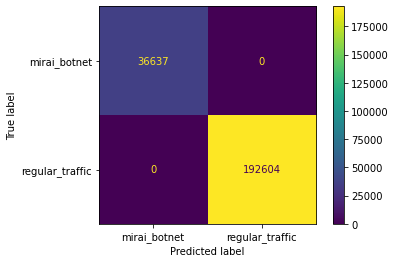

In [13]:
# Decision tree model
dt_pred = dt_model.predict(X_test)
print("The accuracy score of the DT model is:", accuracy_score(y_test, dt_pred))
f1_dt_measure = f1_score(y_test, dt_pred, average='weighted')
print("The f_measure for dt is:", f1_dt_measure)
plot_confusion_matrix(dt_model, X_test, y_test, display_labels=["mirai_botnet", "regular_traffic"])

The accuracy score of the NN model is: 0.8853259233732186
The f_measure for nn is: 0.8585496343725028


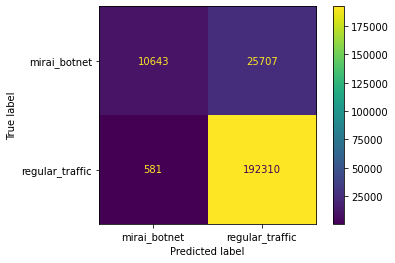

In [9]:
# Neural Network model
nn_pred = nn_model.predict(X_test)
print("The accuracy score of the NN model is:",accuracy_score(y_test, nn_pred))
f1_nn_measure = f1_score(y_test, nn_pred, average='weighted')
print("The f_measure for nn is:", f1_nn_measure)
plot_confusion_matrix(nn_model, X_test, y_test, display_labels=["mirai_botnet", "regular_traffic"])

The accuracy score of the SVM model is: 0.8581818181818182
The f_measure for svm is: 0.8639879009386519


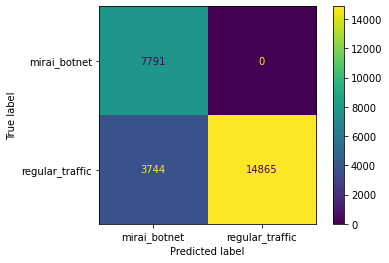

In [15]:
# Support vector machine
svm_pred = svm_model.predict(X_test_short)
print("The accuracy score of the SVM model is:",accuracy_score(y_test_short, svm_pred))
f1_svm_measure = f1_score(y_test_short, svm_pred, average='weighted')
print("The f_measure for svm is:", f1_svm_measure)
plot_confusion_matrix(svm_model, X_test_short, y_test_short, display_labels=["mirai_botnet", "regular_traffic"])